In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_issues = pd.read_json('./rails_issues.json')
df_issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,state_reason,draft,pull_request
0,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/issues/48976,1857192729,I_kwDNIULObrKDGQ,48976,Unexpected `schema.rb` change when using `db:m...,...,NaT,NONE,NaN,### Steps to reproduce\r\n<!-- (Guidelines for...,{'url': 'https://api.github.com/repos/rails/ra...,https://api.github.com/repos/rails/rails/issue...,NaN,None,NaN,NaN
1,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/issues/48975,1857100531,I_kwDNIULObrEa8w,48975,rails-ujs ignores submission value of form-ass...,...,NaT,NONE,NaN,### Preface\r\n\r\nBest practice when designin...,{'url': 'https://api.github.com/repos/rails/ra...,https://api.github.com/repos/rails/rails/issue...,NaN,None,NaN,NaN
2,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/pull/48974,1857084305,PR_kwDNIULOWETIyQ,48974,Fix 6.1 change_table setting datetime precision,...,NaT,MEMBER,NaN,### Motivation / Background\r\n\r\nWhile worki...,{'url': 'https://api.github.com/repos/rails/ra...,https://api.github.com/repos/rails/rails/issue...,NaN,None,0.0,{'url': 'https://api.github.com/repos/rails/ra...
3,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/issues/48973,1857065077,I_kwDNIULObrCQdQ,48973,Webdrivers::VersionError: Unable to find lates...,...,NaT,CONTRIBUTOR,NaN,### Steps to reproduce\r\n\r\n• Create a brand...,{'url': 'https://api.github.com/repos/rails/ra...,https://api.github.com/repos/rails/rails/issue...,NaN,None,NaN,NaN
4,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://api.github.com/repos/rails/rails/issue...,https://github.com/rails/rails/pull/48972,1857032357,PR_kwDNIULOWEQTQQ,48972,Ensure target is an attribute for `alias_attri...,...,NaT,CONTRIBUTOR,NaN,### Motivation / Background\r\n\r\nWe ran into...,{'url': 'https://api.github.com/repos/rails/ra...,https://api.github.com/repos/rails/rails/issue...,NaN,None,0.0,{'url': 'https://api.github.com/repos/rails/ra...


In [4]:
df_issues['created_at']

0     2023-08-18 19:28:06+00:00
1     2023-08-18 18:08:52+00:00
2     2023-08-18 17:54:28+00:00
3     2023-08-18 17:38:49+00:00
4     2023-08-18 17:09:56+00:00
                 ...           
495   2023-06-15 00:48:31+00:00
496   2023-06-14 21:13:36+00:00
497   2023-06-14 20:39:15+00:00
498   2023-06-14 19:50:39+00:00
499   2023-06-14 18:22:57+00:00
Name: created_at, Length: 500, dtype: datetime64[ns, UTC]

In [5]:
# Convert the 'created_at' column to datetime type
df_issues['created_at'] = pd.to_datetime(df_issues['created_at'])
df_issues['created_at'] 


0     2023-08-18 19:28:06+00:00
1     2023-08-18 18:08:52+00:00
2     2023-08-18 17:54:28+00:00
3     2023-08-18 17:38:49+00:00
4     2023-08-18 17:09:56+00:00
                 ...           
495   2023-06-15 00:48:31+00:00
496   2023-06-14 21:13:36+00:00
497   2023-06-14 20:39:15+00:00
498   2023-06-14 19:50:39+00:00
499   2023-06-14 18:22:57+00:00
Name: created_at, Length: 500, dtype: datetime64[ns, UTC]

1.	How do the number of issues evolve over time?

In [6]:
# Sort the DataFrame by 'created_at'
df_issues_sorted = df_issues.sort_values('created_at')

In [7]:
# Create a cumulative count of issues over time
df_issues_sorted['cumulative_count'] = range(1, len(df_issues_sorted) + 1)
df_issues_sorted['cumulative_count']

499      1
498      2
497      3
496      4
495      5
      ... 
4      496
3      497
2      498
1      499
0      500
Name: cumulative_count, Length: 500, dtype: int64

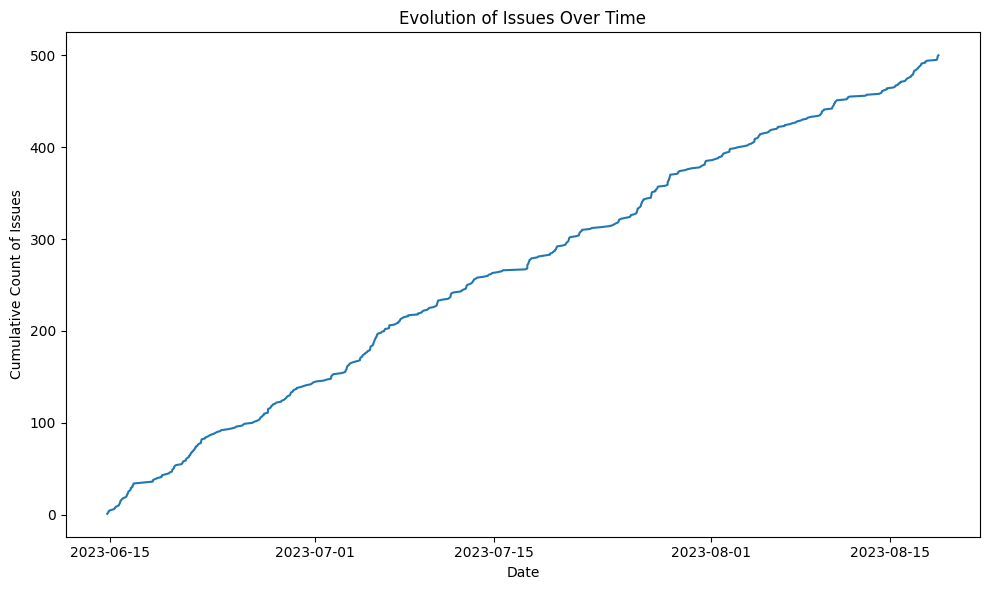

In [8]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_issues_sorted['created_at'], df_issues_sorted['cumulative_count'])
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Issues')
plt.title('Evolution of Issues Over Time')
plt.tight_layout()
plt.show()

In [9]:
# Convert the 'created_at' column to datetime type 
df_issues['created_at'] = pd.to_datetime(df_issues['created_at'])

In [10]:
weekly_issue_count = df_issues.resample('W', on='created_at').size()

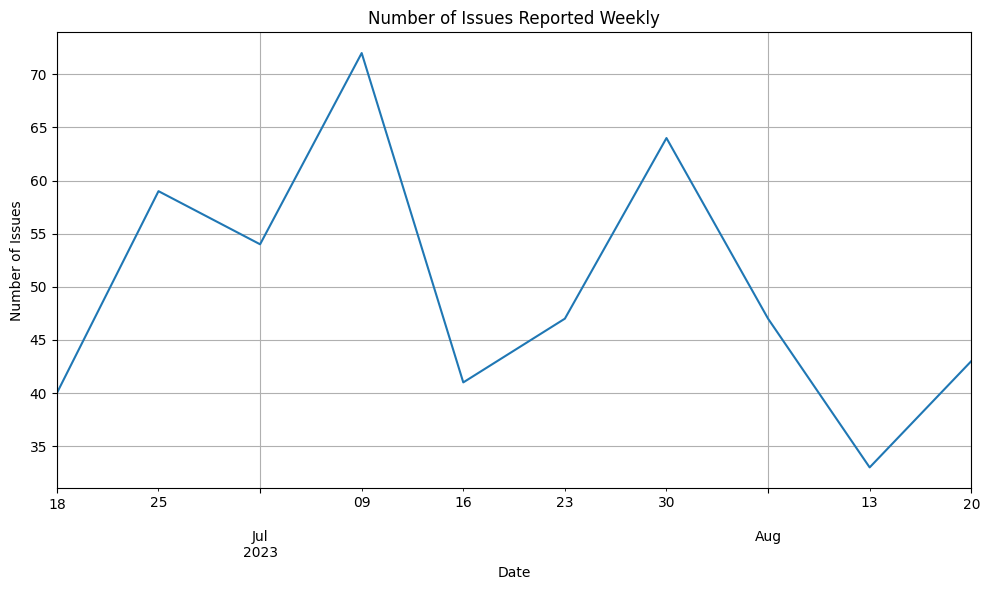

In [11]:
# Plot
plt.figure(figsize=(10, 6))
weekly_issue_count.plot()
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.title('Number of Issues Reported Weekly')
plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:
df_issues['reporter'] = df_issues['user'].apply(lambda x: x['login'] if isinstance(x, dict) and 'login' in x else None)

In [13]:
user_issue_count = df_issues.groupby('reporter').size().sort_values(ascending=False)


In [14]:
print(user_issue_count.head(10))

reporter
skipkayhil                31
zzak                      29
p8                        16
ghiculescu                16
casperisfine              16
akhilgkrishnan            14
eileencodes               13
adrianna-chang-shopify    11
yahonda                   10
nvasilevski               10
dtype: int64


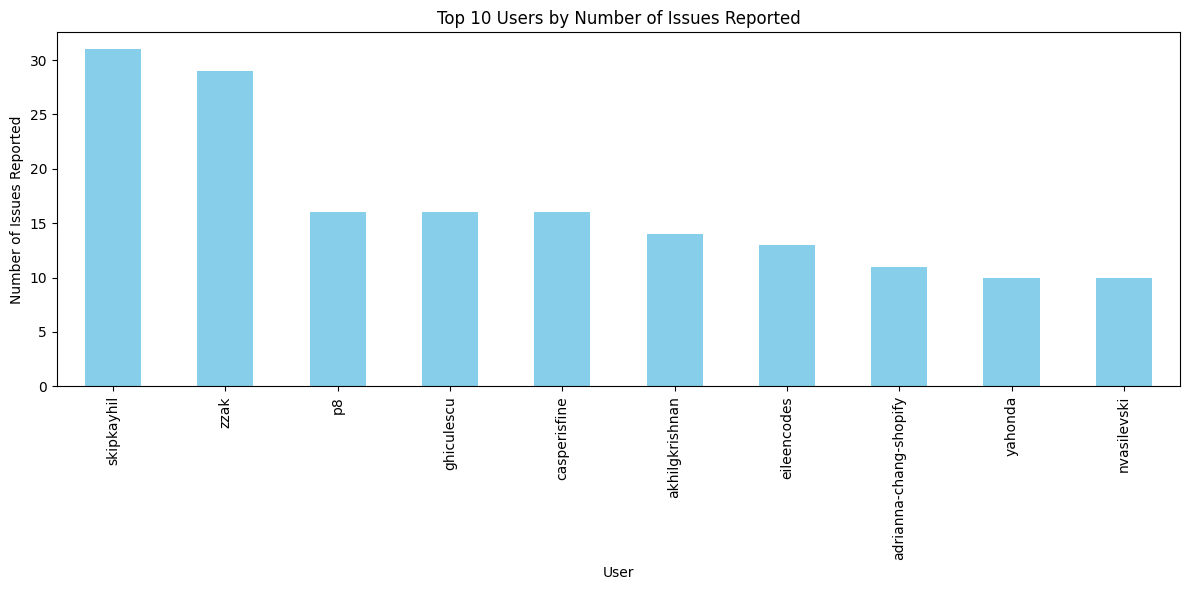

In [19]:
# Visualize the top 10 reporters
plt.figure(figsize=(12, 6))
user_issue_count.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('User')
plt.ylabel('Number of Issues Reported')
plt.title('Top 10 Users by Number of Issues Reported')
plt.tight_layout()
plt.show()

In [16]:
# Extract labels from the nested 'labels' list and 'name' field inside each label dictionary
labels_list = df_issues['labels'].explode().apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else None).dropna()

In [17]:
# Count the occurrences of each label
label_counts = labels_list.value_counts()

In [18]:
# Display the most popular label
most_popular_label = label_counts.idxmax()
print(f"The most popular label is: {most_popular_label} with {label_counts[most_popular_label]} occurrences.")

The most popular label is: activerecord with 194 occurrences.


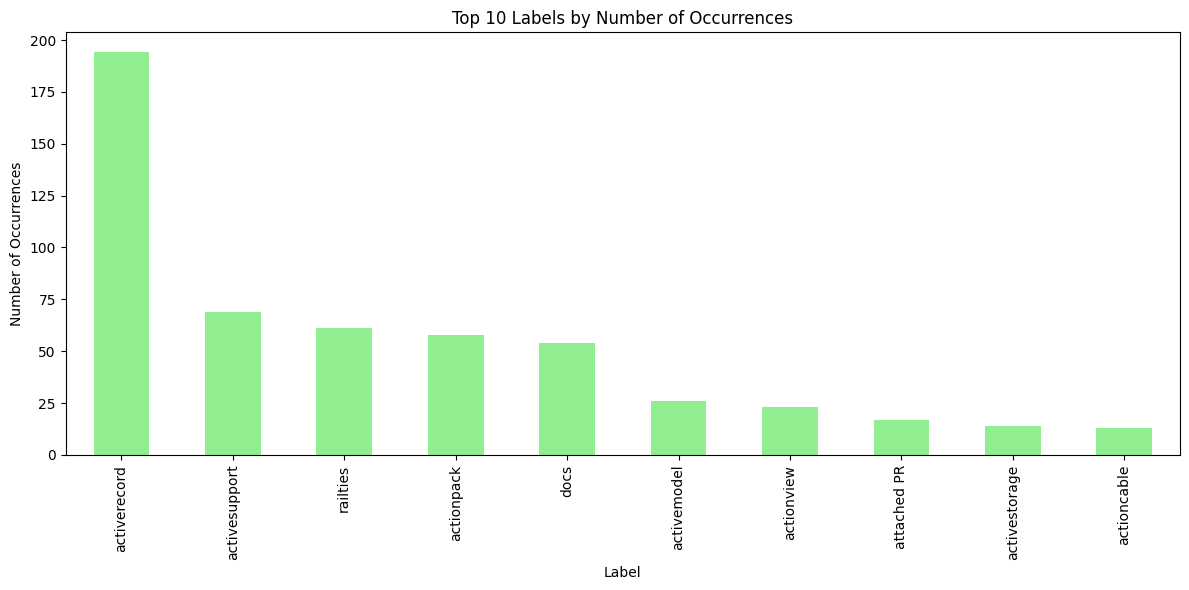

In [19]:
# Optional: To visualize the top 10 labels
plt.figure(figsize=(12, 6))
label_counts.head(10).plot(kind='bar', color='lightgreen')
plt.xlabel('Label')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Labels by Number of Occurrences')
plt.tight_layout()
plt.show()

In [20]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
# 1. Data Preparation

# Extract the first label for each issue
df_issues['single_label'] = df_issues['labels'].apply(lambda x: x[0]['name'] if x else None)

# Filter out issues that don't have any labels or descriptions (to ensure alignment between descriptions and labels)
filtered_issues = df_issues.dropna(subset=['single_label', 'body'])

descriptions = filtered_issues['body'].tolist()
# Extract all unique labels
unique_labels = filtered_issues['single_label'].unique()

# Create a mapping from label to integer
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
labels = [label_mapping[label] for label in filtered_issues['single_label'].tolist()]

# Split data into training and validation sets (for simplicity, doing a 80-20 split here)
train_texts, train_labels = descriptions[:int(0.8*len(descriptions))], labels[:int(0.8*len(labels))]
val_texts, val_labels = descriptions[int(0.8*len(descriptions)):], labels[int(0.8*len(labels)):]



In [22]:
# 2. Model Selection & 3. Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

In [20]:
# Create a Dataset object
class GitHubDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = GitHubDataset(train_encodings, train_labels)
val_dataset = GitHubDataset(val_encodings, val_labels)

NameError: name 'torch' is not defined

In [24]:
# 4. Model Training
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_mapping))
training_args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    logging_steps=10,
    save_strategy="epoch",
    output_dir="./model",
    do_train=True,
    do_eval=True,
    num_train_epochs=3,
    push_to_hub=False,
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

In [26]:
trainer.train()

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  8%|▊         | 10/132 [09:54<1:58:34, 58.32s/it]

{'loss': 2.5706, 'learning_rate': 4.621212121212121e-05, 'epoch': 0.23}


 15%|█▌        | 20/132 [20:14<1:50:11, 59.04s/it]

{'loss': 2.1365, 'learning_rate': 4.242424242424243e-05, 'epoch': 0.45}


 23%|██▎       | 30/132 [30:34<1:48:26, 63.79s/it]

{'loss': 2.1109, 'learning_rate': 3.8636363636363636e-05, 'epoch': 0.68}


 30%|███       | 40/132 [41:11<1:39:03, 64.60s/it]

{'loss': 2.0453, 'learning_rate': 3.484848484848485e-05, 'epoch': 0.91}


                                                  
 33%|███▎      | 44/132 [47:55<1:18:45, 53.70s/it]

{'eval_loss': 1.9995616674423218, 'eval_runtime': 189.3298, 'eval_samples_per_second': 0.465, 'eval_steps_per_second': 0.058, 'epoch': 1.0}


 38%|███▊      | 50/132 [53:55<1:32:58, 68.03s/it] 

{'loss': 2.1187, 'learning_rate': 3.106060606060606e-05, 'epoch': 1.14}


 45%|████▌     | 60/132 [1:18:10<4:50:54, 242.42s/it]

{'loss': 2.0606, 'learning_rate': 2.7272727272727273e-05, 'epoch': 1.36}


 53%|█████▎    | 70/132 [1:28:44<1:06:23, 64.25s/it] 

{'loss': 1.9854, 'learning_rate': 2.3484848484848487e-05, 'epoch': 1.59}


 61%|██████    | 80/132 [1:39:01<54:41, 63.10s/it]  

{'loss': 1.8021, 'learning_rate': 1.9696969696969697e-05, 'epoch': 1.82}


                                                  
 67%|██████▋   | 88/132 [1:51:15<43:05, 58.77s/it]

{'eval_loss': 1.9568854570388794, 'eval_runtime': 222.2552, 'eval_samples_per_second': 0.396, 'eval_steps_per_second': 0.049, 'epoch': 2.0}


 68%|██████▊   | 90/132 [1:53:45<1:19:00, 112.86s/it]

{'loss': 1.9758, 'learning_rate': 1.590909090909091e-05, 'epoch': 2.05}


 76%|███████▌  | 100/132 [2:04:49<36:01, 67.53s/it]  

{'loss': 1.7291, 'learning_rate': 1.2121212121212122e-05, 'epoch': 2.27}


 83%|████████▎ | 110/132 [2:16:11<25:29, 69.53s/it]

{'loss': 1.7552, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}


 91%|█████████ | 120/132 [2:27:15<13:16, 66.34s/it]

{'loss': 1.6716, 'learning_rate': 4.5454545454545455e-06, 'epoch': 2.73}


 98%|█████████▊| 130/132 [2:38:33<02:14, 67.19s/it]

{'loss': 1.7769, 'learning_rate': 7.575757575757576e-07, 'epoch': 2.95}


                                                   
100%|██████████| 132/132 [2:44:07<00:00, 59.66s/it]

{'eval_loss': 1.8101749420166016, 'eval_runtime': 223.5759, 'eval_samples_per_second': 0.394, 'eval_steps_per_second': 0.049, 'epoch': 3.0}


100%|██████████| 132/132 [2:44:09<00:00, 74.62s/it]

{'train_runtime': 9849.7662, 'train_samples_per_second': 0.106, 'train_steps_per_second': 0.013, 'train_loss': 1.9746108235734883, 'epoch': 3.0}


TrainOutput(global_step=132, training_loss=1.9746108235734883, metrics={'train_runtime': 9849.7662, 'train_samples_per_second': 0.106, 'train_steps_per_second': 0.013, 'train_loss': 1.9746108235734883, 'epoch': 3.0})

In [27]:
# 5. Evaluation
results = trainer.evaluate()

print(results)

100%|██████████| 11/11 [03:21<00:00, 18.34s/it]

{'eval_loss': 1.8101749420166016, 'eval_runtime': 219.7375, 'eval_samples_per_second': 0.4, 'eval_steps_per_second': 0.05, 'epoch': 3.0}


In [29]:
from sklearn.metrics import accuracy_score, f1_score

In [31]:
model = DistilBertForSequenceClassification.from_pretrained("./model/checkpoint-132/")


In [32]:
training_args = TrainingArguments(
    per_device_eval_batch_size=8,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    output_dir="./model",
    do_train=False,
    do_eval=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)


In [33]:
results = trainer.evaluate()
print(results)

100%|██████████| 11/11 [02:58<00:00, 16.22s/it]

{'eval_loss': 1.8101749420166016, 'eval_runtime': 192.0426, 'eval_samples_per_second': 0.458, 'eval_steps_per_second': 0.057}


In [34]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.argmax(axis=-1)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    return {'accuracy': accuracy, 'f1': f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)


In [35]:
results = trainer.evaluate()
print(results)

100%|██████████| 11/11 [02:44<00:00, 14.98s/it]

{'eval_loss': 1.8101749420166016, 'eval_accuracy': 0.4772727272727273, 'eval_f1': 0.34655248133509003, 'eval_runtime': 180.6292, 'eval_samples_per_second': 0.487, 'eval_steps_per_second': 0.061}


In [46]:
text = "undefine_attribute_methods now clears alias attribute methods"
encoded_text = tokenizer(text, truncation=True, padding=True, return_tensors="pt")


In [47]:
with torch.no_grad():
    output = model(**encoded_text)
    logits = output.logits
    predicted_label_idx = torch.argmax(logits, dim=1).item()


In [49]:
predicted_label = [k for k, v in label_mapping.items() if v == predicted_label_idx][0]
print(f"The predicted label for the given text is: {predicted_label}")


The predicted label for the given text is: activerecord
